In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns
from sklearn.datasets import make_classification
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from sklearn.svm import SVC
import os 
import csv
import tensorflow as tf
import pandas as pd
import nltk
from nltk.tokenize import word_tokenize
import re
import emoji
from keras.preprocessing.text import Tokenizer
import random
import nltk
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.callbacks import EarlyStopping
from sklearn.model_selection import train_test_split
from keras.models import Sequential
from keras.layers import Embedding, GlobalAveragePooling1D, Dense
from keras import backend
import tensorflow as tf
import string
from collections import Counter

In [2]:
with open('amazon_cells_labelled.txt', 'r') as txt_file:
    lines = txt_file.readlines()

In [3]:
delimiter = '\t'  # Change this to the actual delimiter in your text file
data = [line.strip().split(delimiter) for line in lines]

In [4]:
header = ['Review', 'Sentiment'] 

In [5]:
with open('amazon.csv', 'w', newline='') as csv_file:
    csv_writer = csv.writer(csv_file)
    
    # Write the header row
    csv_writer.writerow(header)
    
    # Write the data rows
    for row in data:
        csv_writer.writerow(row)

In [6]:
df=pd.read_csv('amazon.csv')

In [7]:
df.shape

(1000, 2)

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   Review     1000 non-null   object
 1   Sentiment  1000 non-null   int64 
dtypes: int64(1), object(1)
memory usage: 15.8+ KB


In [9]:
df.describe()

,Sentiment
count,1000.00000
mean,0.50000
std,0.50025
min,0.00000
25%,0.00000
50%,0.50000
75%,1.00000
max,1.00000


In [10]:
df['Sentiment'].value_counts()

0    500
1    500
Name: Sentiment, dtype: int64

In [11]:
df.isna().sum()

Review       0
Sentiment    0
dtype: int64

In [12]:
text_data = df['Review'].astype(str)

In [13]:
# Function to clean and preprocess text
def clean_text(text):
    # Remove special characters and punctuation
    text = re.sub(r'[^\w\s]', '', text)
    # Remove numbers
    text = re.sub(r'\d', '', text)
    # Convert text to lowercase
    text = text.lower()
    return text

In [14]:
# Apply text cleaning to the 'text' column
df['Clean_Review'] = df['Review'].apply(clean_text)

In [15]:
# Function to check for unusual characters (e.g., emojis, non-English characters)
def has_unusual_characters(text):
    for char in text:
        if char not in string.printable:
            return True
    return False


In [16]:
# Check if any rows contain unusual characters
df['has_unusual_chars'] = df['Clean_Review'].apply(has_unusual_characters)

In [17]:
# Count vocabulary size
all_text = ' '.join(df['Clean_Review'])
words = all_text.split()
vocabulary_size = len(Counter(words))

In [18]:
# Tokenize the text data into individual words
tokens = [word_tokenize(text) for text in text_data]

In [19]:
# Flatten the list of tokens into a single list
all_words = [word for sublist in tokens for word in sublist]

In [20]:
# Get the unique words (vocabulary)
vocabulary = set(all_words)

In [21]:
# Calculate the vocabulary size
vocabulary_size = len(vocabulary) 
print("Vocabulary Size:", vocabulary_size)

Vocabulary Size: 2235


In [22]:
commentary = df['Review']
list_of_char = []
for comment in commentary:
    for char in comment:
        if char not in list_of_char:
            list_of_char.append(char)
print(list_of_char)

['S', 'o', ' ', 't', 'h', 'e', 'r', 'i', 's', 'n', 'w', 'a', 'y', 'f', 'm', 'p', 'l', 'u', 'g', 'U', 'I', 'b', 'c', 'v', '.', 'G', 'd', ',', 'E', 'x', 'j', 'T', '4', '5', 'M', 'A', 'J', 'O', 'R', 'P', 'B', 'L', '!', 'z', 'N', 'W', 'q', 'H', '+', 'V', '"', 'Y', 'D', 'F', 'k', "'", 'K', 'C', '/', '7', '3', '6', '8', '0', '2', '?', 'Z', '-', '1', ':', ')', '(', 'Q', '&', '$', '*', ';', 'X', '%', '9', '#', '[', ']']


In [23]:
reviews = df['Review']

alpha_chars = set()
num_chars = set()
nonal_num_chars = set()

for review in reviews:
    tokens = word_tokenize(review.lower())
    for token in tokens:
        for char in token:
            if re.match(r'[a-zA-Z]', char):
                alpha_chars.add(char)
            elif re.match(r'[0-9]', char):
                num_chars.add(char)
            else:
                nonal_num_chars.add(char)

In [24]:
print('Alpha Characters:')
print(alpha_chars)
print('Total of', len(alpha_chars), 'unique English letters in this dataset\n')

print('Numeric Characters:')
print(num_chars)
print('Total of', len(num_chars), 'unique numerical characters in this dataset\n')

print('Non-alphanumeric characters:')
print(nonal_num_chars)
print('Total of', len(nonal_num_chars), 'unique special characters in this dataset')

Alpha Characters:
{'j', 'a', 'o', 'w', 'i', 'v', 'y', 'k', 'l', 'e', 's', 'x', 'b', 'h', 'g', 't', 'q', 'f', 'z', 'u', 'n', 'm', 'r', 'd', 'c', 'p'}
Total of 26 unique English letters in this dataset

Numeric Characters:
{'4', '7', '9', '2', '3', '6', '0', '5', '8', '1'}
Total of 10 unique numerical characters in this dataset

Non-alphanumeric characters:
{'+', '?', '$', '!', ',', '(', "'", ':', '`', ')', '.', '%', '[', ']', ';', '*', '#', '-', '&', '/'}
Total of 20 unique special characters in this dataset


In [25]:
def checkEmoji(text):
    has_emoji = any(emoji.is_emoji(char) for char in text)
    return has_emoji

df["emoji"] = df['Review'].apply(lambda x: checkEmoji(x))

emoji_counts = df['emoji'].value_counts()
print(emoji_counts)

False    1000
Name: emoji, dtype: int64


In [26]:
# Tokenize the text data
tokenizer = Tokenizer()
tokenizer.fit_on_texts(df['Review'])
sequences = tokenizer.texts_to_sequences(df['Review'])

In [27]:
df.head()

,Review,Sentiment,Clean_Review,has_unusual_chars,emoji
0,So there is no way for me to plug it in here i...,0,so there is no way for me to plug it in here i...,False,False
1,"Good case, Excellent value.",1,good case excellent value,False,False
2,Great for the jawbone.,1,great for the jawbone,False,False
3,Tied to charger for conversations lasting more...,0,tied to charger for conversations lasting more...,False,False
4,The mic is great.,1,the mic is great,False,False


In [28]:
df = df.drop(['Review', 'has_unusual_chars'], axis=1)

In [29]:
df.head()

,Sentiment,Clean_Review,emoji
0,0,so there is no way for me to plug it in here i...,False
1,1,good case excellent value,False
2,1,great for the jawbone,False
3,0,tied to charger for conversations lasting more...,False
4,1,the mic is great,False


In [30]:
df.to_csv('clean data.csv', index=False)

In [31]:
# Get the maximum sequence length
max_sequence_length = max(len(seq) for seq in sequences)
print("Max Sequence Length", max_sequence_length)

Max Sequence Length 30


In [32]:
# Set the proposed word embedding length
proposed_embedding_length = int(np.ceil(max_sequence_length * 0.1))

print("Proposed Embedding Length", proposed_embedding_length)

Proposed Embedding Length 3


In [33]:
# Calculate sequence lengths
sequence_lengths = [len(word_tokenize(review)) for review in review]

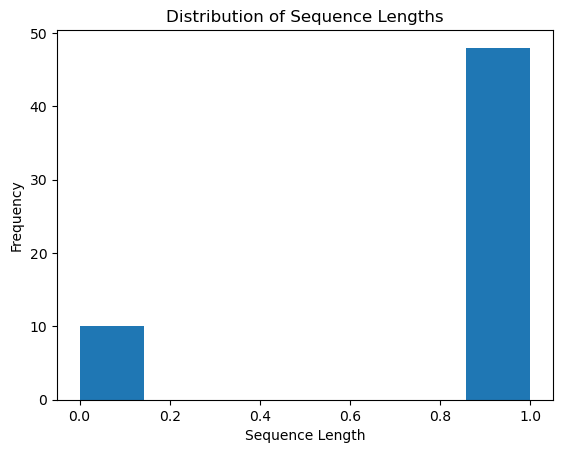

In [34]:
# Plot the distribution of sequence lengths
plt.hist(sequence_lengths, bins='auto')
plt.xlabel('Sequence Length')
plt.ylabel('Frequency')
plt.title('Distribution of Sequence Lengths')
plt.show()

In [35]:
# Calculate the lengths of all sequences
sequence_lengths = [len(seq) for seq in sequences]

# Maximum sequence length
max_sequence_length = np.max(sequence_lengths)

# Median sequence length
median_sequence_length = np.median(sequence_lengths)

# Minimum sequence length
min_sequence_length = np.min(sequence_lengths)

print("Maximum Sequence Length:", max_sequence_length)
print("Median Sequence Length:", median_sequence_length)
print("Minimum Sequence Length:", min_sequence_length)

Maximum Sequence Length: 30
Median Sequence Length: 9.0
Minimum Sequence Length: 1


In [36]:
rev_list = []
rev_len = []
stop_words = stopwords.words('english')

for review in df.Clean_Review:
    review = re.sub("[^a-zA-Z\s]", "", review)
    review = review.lower()
    review = nltk.word_tokenize(review)
    review = [word for word in review if not word in stop_words]
    lemma = WordNetLemmatizer()
    review = [lemma.lemmatize(word) for word in review]
    length = len(review)
    rev_len.append(length)
    rev_list.append(review)

n = random.randint(0, len(rev_list))
rev_list = np.asarray(rev_list, dtype=object)
print(rev_list[n])

['reception', 'headset', 'excellent']


In [37]:
tokenizer = Tokenizer(lower=True)
tokenizer.fit_on_texts(rev_list)
word_index = tokenizer.word_index
word_counts = list(tokenizer.word_counts.items())
word_counts.sort(key=lambda y: y[1], reverse=True)
vocab_size = len(tokenizer.word_index)+1

max_seq_emb = int(round(vocab_size ** (1/4))) #, 0))
max_len = len(max(rev_list, key=len))

sequence = tokenizer.texts_to_sequences(rev_list)

In [38]:
# Pad sequences
padded_sequences = pad_sequences(sequences, maxlen=max_len, padding='post')

print(padded_sequences)

[[ 11  47   8 ... 190   6 812]
 [ 21  48  54 ...   0   0   0]
 [ 16  11   1 ...   0   0   0]
 ...
 [ 90  61  13 ...   0   0   0]
 [  1  68 139 ...   0   0   0]
 [ 23  87  13 ...   0   0   0]]


In [39]:
print('Vocabulary size: ',vocab_size)
print('max sequence embed: ', max_seq_emb)
print('max review length: ', max_len)

Vocabulary size:  1626
max sequence embed:  6
max review length:  16


In [40]:
n = random.randint(0, len(rev_list))
print('Original Review:')
print('"', df.Clean_Review[n], '"')
print('------------------')
print('')

print('Review split, lemmatized, and stop words removed:')
print(rev_list[n])
print('------------------')
print('')

print('Review tokenized, sequenced, and padded:')
print(padded_sequences[n])

Original Review:
" i was not impressed by this product "
------------------

Review split, lemmatized, and stop words removed:
['impressed', 'product']
------------------

Review tokenized, sequenced, and padded:
[  2  17  13 173 190   7  24   0   0   0   0   0   0   0   0   0]


In [41]:
num_classes = 2  # Two categories: positive/negative

model = tf.keras.Sequential([
    
    tf.keras.layers.Dense(num_classes, activation='sigmoid')
    
])

print("Number of sentiment categories:", num_classes)

Number of sentiment categories: 2


In [42]:
backend.clear_session()

model = Sequential()
model.add(Embedding(vocab_size, max_seq_emb))
model.add(GlobalAveragePooling1D())
model.add(Dense(50, activation="sigmoid"))
model.add(Dense(1, activation="sigmoid"))

model.compile(loss='binary_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, None, 6)           9756      
                                                                 
 global_average_pooling1d (  (None, 6)                 0         
 GlobalAveragePooling1D)                                         
                                                                 
 dense (Dense)               (None, 50)                350       
                                                                 
 dense_1 (Dense)             (None, 1)                 51        
                                                                 
Total params: 10157 (39.68 KB)
Trainable params: 10157 (39.68 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [43]:
X = padded_sequences
X

array([[ 11,  47,   8, ..., 190,   6, 812],
       [ 21,  48,  54, ...,   0,   0,   0],
       [ 16,  11,   1, ...,   0,   0,   0],
       ...,
       [ 90,  61,  13, ...,   0,   0,   0],
       [  1,  68, 139, ...,   0,   0,   0],
       [ 23,  87,  13, ...,   0,   0,   0]])

In [44]:
y = np.array(df['Clean_Review'].values)

In [45]:
print(X.shape, y.shape)

(1000, 16) (1000,)


In [46]:
X_train, X_test, y_train, y_test = train_test_split(padded_sequences,
                                                    np.array(df.Sentiment),
                                                    test_size=0.2,
                                                    random_state=42)

In [47]:
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.2, random_state=42)

In [48]:

print(X_train.shape, y_train.shape)

(640, 16) (640,)


In [49]:
pd.DataFrame(X_train).to_csv('X_train.csv')
pd.DataFrame(X_test).to_csv('X_test.csv')
pd.DataFrame(y_train).to_csv('y_train.csv')
pd.DataFrame(y_test).to_csv('y_test.csv')

In [50]:
from sklearn.metrics import precision_score, recall_score, f1_score
from sklearn.ensemble import RandomForestClassifier

In [51]:
def train_model(X_train, y_train):
    model = RandomForestClassifier()  # You can use an appropriate model for your task
    model.fit(X_train, y_train)
    return model

In [52]:
model = train_model(X_train, y_train)

In [53]:
# Make predictions on the test set
predicted_labels = model.predict(X_test)

# Calculate evaluation metrics
precision = precision_score(y_test, predicted_labels)
recall = recall_score(y_test, predicted_labels)
f1 = f1_score(y_test, predicted_labels)

# Print or store the results
print(f"Precision: {precision:.2f}")
print(f"Recall: {recall:.2f}")
print(f"F1-Score: {f1:.2f}")

Precision: 0.71
Recall: 0.51
F1-Score: 0.60


In [54]:
print('Size & shape of the training data set:')
print('Training data X values (reviews text) size = ',X_train.size, ' and shape = ', X_train.shape)
print('Training data Y values (review ratings) size = ',y_train.size, ' and shape = ', y_train.shape)

print('Size & shape of the training data set:')
print('Training data X values (reviews text) size = ',X_test.size, ' and shape = ', X_test.shape)
print('Training data Y values (review ratings) size = ',y_test.size, ' and shape = ', y_test.shape)

Size & shape of the training data set:
Training data X values (reviews text) size =  10240  and shape =  (640, 16)
Training data Y values (review ratings) size =  640  and shape =  (640,)
Size & shape of the training data set:
Training data X values (reviews text) size =  3200  and shape =  (200, 16)
Training data Y values (review ratings) size =  200  and shape =  (200,)


In [55]:
# Define hyperparameters
activation = 'sigmoid'
loss = 'binary_crossentropy'
optimizer = 'adam'  # or 'rmsprop'


# Define early_stopping_monitor
early_stopping_monitor = EarlyStopping(patience=8)

# Define the model architecture
model = Sequential([
    Embedding(38112, 8, input_length=None),
    GlobalAveragePooling1D(),
    Dense(50, activation='sigmoid'),
    Dense(1, activation='sigmoid')
])

# Compile the model
model.compile(loss=loss, optimizer=optimizer, metrics=['accuracy'])

# Print the model summary
model.summary()

# Train the model
history = model.fit(X_train, y_train, batch_size=32, epochs=80,
                    validation_split=0.2, callbacks=[early_stopping_monitor], verbose=True)

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_1 (Embedding)     (None, None, 8)           304896    
                                                                 
 global_average_pooling1d_1  (None, 8)                 0         
  (GlobalAveragePooling1D)                                       
                                                                 
 dense_2 (Dense)             (None, 50)                450       
                                                                 
 dense_3 (Dense)             (None, 1)                 51        
                                                                 
Total params: 305397 (1.16 MB)
Trainable params: 305397 (1.16 MB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________
Epoch 1/80
16/16 [==============================] - 2s 24ms/step - loss: 0.7073 - ac

In [56]:
score = model.evaluate(X_test, y_test, verbose=1)

print('Final Model Loss: ', round(score[0],5))
print('Final Model Accuracy: ', round(score[1]*100, 2),'%')

7/7 [==============================] - 0s 2ms/step - loss: 0.4426 - accuracy: 0.8000
Final Model Loss:  0.44264
Final Model Accuracy:  80.0 %


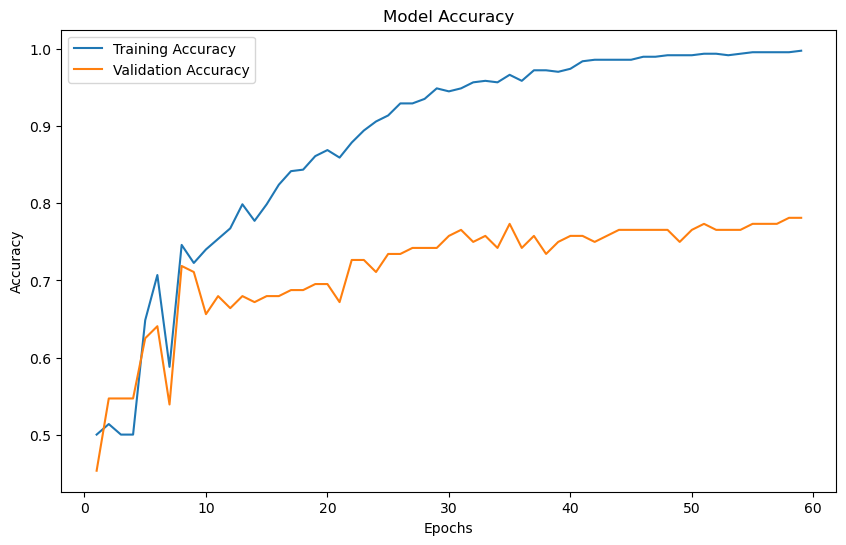

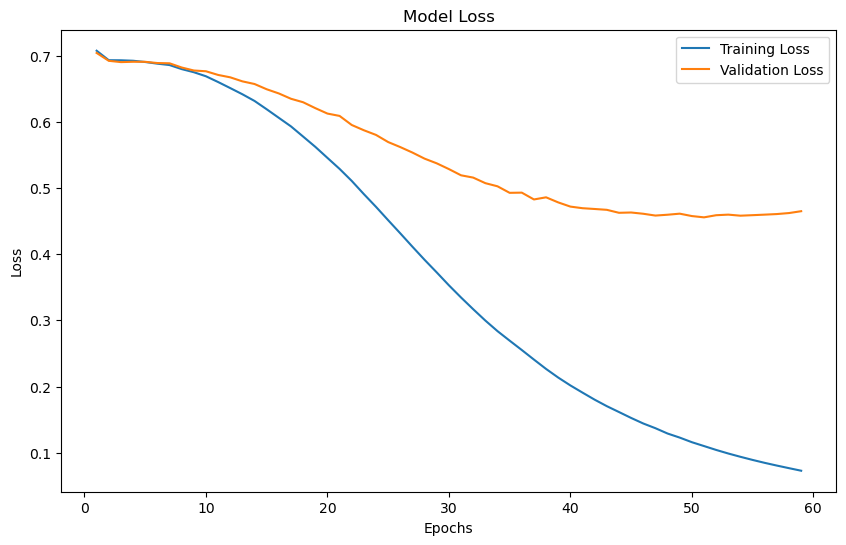

In [57]:
# Get the training history
accuracy = history.history['accuracy']
loss = history.history['loss']
val_accuracy = history.history['val_accuracy']
val_loss = history.history['val_loss']

# Plot accuracy
plt.figure(figsize=(10, 6))
plt.plot(range(1, len(accuracy) + 1), accuracy, label='Training Accuracy')
plt.plot(range(1, len(val_accuracy) + 1), val_accuracy, label='Validation Accuracy')
plt.title('Model Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

# Plot loss
plt.figure(figsize=(10, 6))
plt.plot(range(1, len(loss) + 1), loss, label='Training Loss')
plt.plot(range(1, len(val_loss) + 1), val_loss, label='Validation Loss')
plt.title('Model Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

<function matplotlib.pyplot.show(close=None, block=None)>

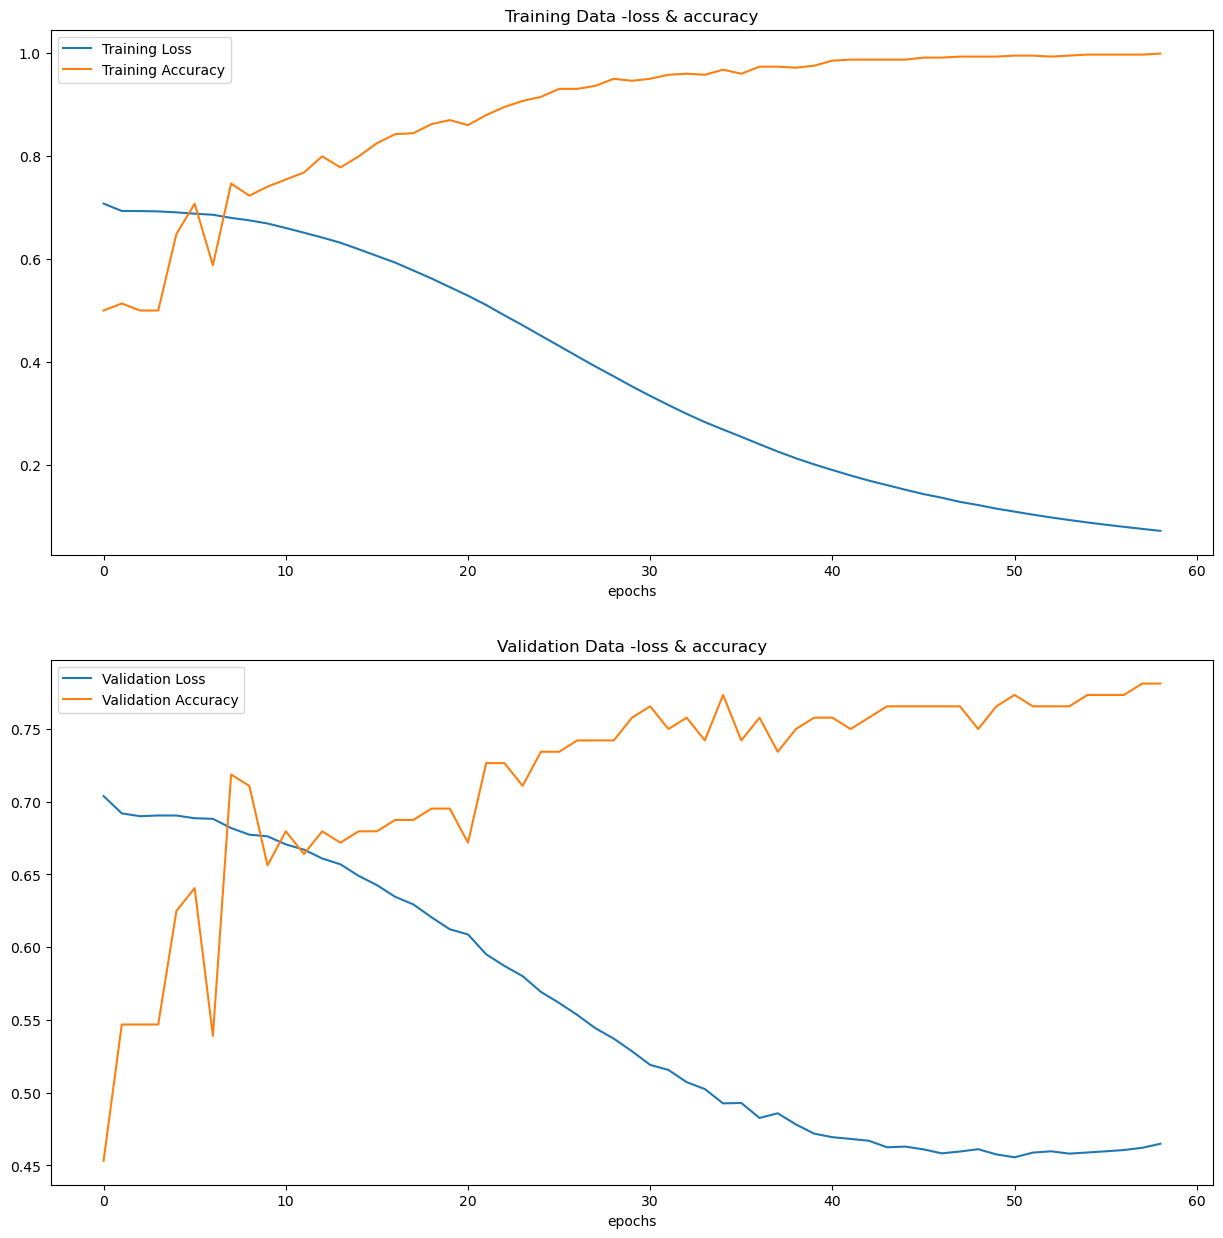

In [58]:
plt.figure(figsize=(15,15))

plt.subplot(2,1,1)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.xlabel('epochs')
plt.legend()
plt.title('Training Data -loss & accuracy')

plt.subplot(2,1,2)
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('epochs')
plt.legend()
plt.title('Validation Data -loss & accuracy')

plt.show

7/7 [==============================] - 0s 2ms/step


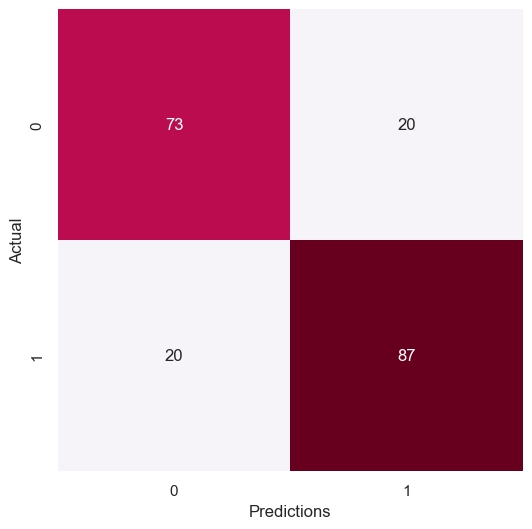

In [59]:
predictions = model.predict(X_test)
predictions = np.round(predictions, 0).astype(int)

con_mat = confusion_matrix(y_test, predictions)
sns.set(rc={'figure.figsize': (6, 6)})
cmap = plt.cm.PuRd  
sns.heatmap(con_mat, annot=True, fmt='d', cbar=False, cmap=cmap).set(ylabel='Actual', xlabel='Predictions')
plt.show()

In [60]:
loss, accuracy = model.evaluate(X_test, y_test, verbose=0)

# Make predictions on the test set
y_pred = (model.predict(X_test) > 0.5).astype(int)

# Calculate additional evaluation metrics
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix

accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
confusion = confusion_matrix(y_test, y_pred)

print(f"Test Loss: {loss:.4f}")
print(f"Test Accuracy: {accuracy:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1 Score: {f1:.4f}")
print("Confusion Matrix:")
print(confusion)

7/7 [==============================] - 0s 2ms/step
Test Loss: 0.4426
Test Accuracy: 0.8000
Precision: 0.8131
Recall: 0.8131
F1 Score: 0.8131
Confusion Matrix:
[[73 20]
 [20 87]]


In [61]:
model.save('D213_trained_model.keras')